visualization

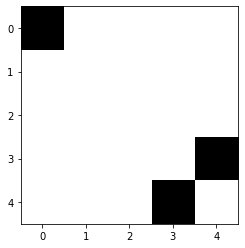

tensor([[[[0.8291, 0.4095, 0.3342, 0.4797, 0.5741],
          [0.2041, 0.6335, 0.5849, 0.1617, 0.3865],
          [0.5455, 0.1099, 0.5336, 0.6176, 0.4499],
          [0.4346, 0.4632, 0.4836, 0.3452, 0.7406],
          [0.1344, 0.5163, 0.2153, 0.8363, 0.2419]]],


        [[[0.7645, 0.3519, 0.4481, 0.3072, 0.6368],
          [0.3275, 0.2964, 0.9426, 0.7861, 0.7417],
          [0.7721, 0.7340, 0.5086, 0.4126, 0.3882],
          [0.4816, 0.3722, 0.3667, 0.8580, 0.6363],
          [0.3358, 0.5629, 0.7267, 0.6127, 0.3422]]]])
tensor([[[[0.6690]]],


        [[[0.7541]]]])


In [16]:
# verify dropout function  neck50

import torch
import cv2
import matplotlib.pyplot as plt

a = torch.rand([2,2,5,5])
attention = torch.mean(a, dim=1, keepdim=True)
max_val,_ = torch.max(attention.view(2,-1),dim=1,keepdim=True)
thr = max_val * 0.8
thr = thr.view(2,1,1,1)
mask = (attention < thr).detach().cpu().numpy()
# cv2.imshow('mask',mask[0].squeeze())
# cv2.waitKey()
plt.imshow(mask[0].squeeze(), cmap='gray')
plt.show()

# print(a)
print(attention)
print(thr)

In [18]:
import torch
a = torch.tensor([2,3])
b = torch.tensor([3,2])
print(torch.mul(a,b))


tensor([6, 6])


In [54]:
# soft_label.py 

import cv2
import numpy as  np

def _sigmoid(x):
    z = np.exp(-x)
    sig = 1 / (1+z)
    return (sig)

    
a = np.random.rand(2,5,5)
print(a)
rect = np.array([[0,0],[0,1],[1,1],[1,0]], np.int32)
b = torch.tensor(1,dtype=torch.float32)
print(b)
score = _sigmoid(np.array(b))
cv2.fillConvexPoly(a[0], rect, score)
print(a)




[[[0.38061092 0.7614966  0.78760615 0.93694619 0.52193596]
  [0.36973036 0.9501027  0.20694673 0.46166495 0.15631667]
  [0.83148153 0.24184182 0.35977547 0.29899741 0.22063775]
  [0.83964191 0.75910764 0.41658329 0.76769669 0.65013374]
  [0.26541767 0.86917096 0.27072457 0.96891331 0.16876316]]

 [[0.4246824  0.56089967 0.27868546 0.31766894 0.44208194]
  [0.91998606 0.18128022 0.42837323 0.50828115 0.00950295]
  [0.78695838 0.87674686 0.31032887 0.74164673 0.12670042]
  [0.31892343 0.78580008 0.24804218 0.06919116 0.44310393]
  [0.83846524 0.71735934 0.21136386 0.38087683 0.50277661]]]
tensor(1.)
[[[0.73105859 0.73105859 0.78760615 0.93694619 0.52193596]
  [0.73105859 0.73105859 0.20694673 0.46166495 0.15631667]
  [0.83148153 0.24184182 0.35977547 0.29899741 0.22063775]
  [0.83964191 0.75910764 0.41658329 0.76769669 0.65013374]
  [0.26541767 0.86917096 0.27072457 0.96891331 0.16876316]]

 [[0.4246824  0.56089967 0.27868546 0.31766894 0.44208194]
  [0.91998606 0.18128022 0.42837323 0.5

In [31]:
# soft_label.py  verify sigmoid function
# sigmoid function

def sigmoid(x):
    z = np.exp(-x)
    sig = 1 / (1+z)
    return sig

x = 4
sig = sigmoid(x)
print(sig)

0.9820137900379085


In [34]:
mask_score = np.zeros([2,5,5])
mask_score[0,:,:] = 1
print(mask_score)

[[[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


In [58]:
#verify soft loss
import torch.nn as nn
import torch
import numpy as np
class SoftCrossEntropyLoss(nn.Module):

    def __init__(self,
                 reduction='mean',
                 class_weight=None,
                 bce_use_sigmoid=False,
                 loss_weight=1.0):
        """CrossEntropyLoss.

        Args:
            use_sigmoid (bool, optional): Whether the prediction uses sigmoid
                of softmax. Defaults to False.
            use_mask (bool, optional): Whether to use mask cross entropy loss.
                Defaults to False.
            reduction (str, optional): . Defaults to 'mean'.
                Options are "none", "mean" and "sum".
            class_weight (list[float], optional): Weight of each class.
                Defaults to None.
            loss_weight (float, optional): Weight of the loss. Defaults to 1.0.
        """
        super(SoftCrossEntropyLoss, self).__init__()
        self.reduction = reduction
        self.loss_weight = loss_weight
        self.class_weight = class_weight
        self.bce_use_sigmoid = bce_use_sigmoid

    def forward(self,
                cls_score,
                label,
                label_,
                weight=None,
                avg_factor=None,
                reduction_override=None,
                **kwargs):
        """Forward function.

        Args:
            cls_score (torch.Tensor): The prediction. shape is (N ,C)
            label (torch.Tensor): The learning label of the prediction. shape is (N, C)
            weight (torch.Tensor, optional): Sample-wise loss weight.
            avg_factor (int, optional): Average factor that is used to average
                the loss. Defaults to None.
            reduction (str, optional): The method used to reduce the loss.
                Options are "none", "mean" and "sum".
        Returns:
            torch.Tensor: The calculated loss
        """
        # cls_score = torch.sigmoid(cls_score)
        # print(cls_score)
        # loss = []
        # for i in range(cls_score.shape[1]):
        #     loss.append(-1 * label[:,i] * torch.log(cls_score[:,i]))
        
        # loss = sum(loss)
        # print(loss)
        # loss = torch.sum(loss) / avg_factor
        cls_score = torch.softmax(cls_score, dim=1)
        print(cls_score)
        loss = []
        index = label_ >= 0
        
        # for i in range(cls_score.shape[1]):
        #     loss.append(-1 * torch.abs(label[:,i] - cls_score[:,i]) * label[:,i] * torch.log(cls_score[:,i]))
        # loss = sum(loss)
        # loss =  (label[index,label_] - cls_score[index,label_]) * label[index,label_] * torch.log(label[index,label_]/(cls_score[index,label_]+1e-6)+1e-6)
        loss = -1* label[index,label_] * torch.log(cls_score[index, label_])
        print(loss)
        print('weight', label[index,label_])
        loss = torch.sum(loss) / avg_factor
        return loss

pred = torch.rand([3,5])
print(pred)
label = torch.rand([3,5])
print(label)
index = torch.ones([3,1], dtype=torch.long).reshape(-1)

# index = index>0
# print(pred[:,0])
mask_loss = SoftCrossEntropyLoss()
loss = mask_loss(pred, label,index, avg_factor = pred.shape[0])

print(loss)


tensor([[0.0292, 0.7055, 0.0093, 0.4838, 0.6822],
        [0.6524, 0.9393, 0.6565, 0.7506, 0.7321],
        [0.5173, 0.0902, 0.9025, 0.0767, 0.2525]])
tensor([[0.2637, 0.3560, 0.5627, 0.6538, 0.2305],
        [0.1933, 0.4308, 0.3014, 0.1799, 0.7130],
        [0.5749, 0.7855, 0.5649, 0.3850, 0.9646]])
tensor([[0.1343, 0.2642, 0.1317, 0.2117, 0.2581],
        [0.1811, 0.2412, 0.1818, 0.1998, 0.1961],
        [0.2206, 0.1439, 0.3242, 0.1420, 0.1693]])
tensor([0.4739, 0.6126, 1.5227])
weight tensor([0.3560, 0.4308, 0.7855])
tensor(0.8697)


In [31]:
import torch
import numpy as np
a = torch.tensor([1,0,1,1])
c = a>=0
print(c)
print(a)
b = torch.tensor([[0,1],[3,3],[0,1],[0,1]])
print(b[c,a])

tensor([True, True, True, True])
tensor([1, 0, 1, 1])
tensor([1, 3, 1, 1])


In [46]:
a = torch.rand([2,4])
print(a)
print(torch.sigmoid(a))

tensor([[0.6372, 0.3279, 0.1948, 0.2485],
        [0.9321, 0.5441, 0.5144, 0.5800]])
tensor([[0.6541, 0.5812, 0.5486, 0.5618],
        [0.7175, 0.6328, 0.6258, 0.6411]])


In [62]:
a = [1,2,3,4,5]
for i in a:
    if i<3:
        print(i)
    elif i<5:
        print(i)


1
2
3
4


In [6]:
import torch
a = torch.rand([4,5])
c = torch.rand([4,5])

print(a)
b = torch.cat([a, c])
# b = a[0][1]
print(b)

tensor([[0.9722, 0.2687, 0.3272, 0.4681, 0.9185],
        [0.4625, 0.0172, 0.5045, 0.3006, 0.1448],
        [0.6476, 0.9461, 0.1008, 0.2640, 0.1089],
        [0.3061, 0.6971, 0.7300, 0.1348, 0.1165]])
tensor([[0.9722, 0.2687, 0.3272, 0.4681, 0.9185],
        [0.4625, 0.0172, 0.5045, 0.3006, 0.1448],
        [0.6476, 0.9461, 0.1008, 0.2640, 0.1089],
        [0.3061, 0.6971, 0.7300, 0.1348, 0.1165],
        [0.3669, 0.5706, 0.1047, 0.5495, 0.1103],
        [0.8056, 0.0066, 0.4653, 0.6637, 0.4176],
        [0.7744, 0.6122, 0.4593, 0.3472, 0.1928],
        [0.0178, 0.4678, 0.3938, 0.3416, 0.0827]])
